<a href="https://colab.research.google.com/github/proyectoTFMUAH/ANN/blob/main/ANN2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


#Cargamos librerias

import tensorflow as tf
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing


# Capamos a 3 decimales
np.set_printoptions(precision=3, suppress=True)

#Cargamos el Dataset desde fichero que hemos generado en R
from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()



Saving DSEuropea.csv to DSEuropea.csv


In [ ]:
#rrevisamos los datos
Pricing_train = pd.read_csv('DSEuropea.csv')
Pricing_train.head()

,Unnamed: 0,vSt,vK,vTmat,vvol,vr,Unnamed: 6
0,1,19.019752,85.864971,53.803172,0.464357,0.057253,18.307547
1,2,69.475322,25.618889,80.115425,0.511415,0.094931,69.469906
2,3,64.124547,30.302197,9.591628,0.078536,0.070882,48.770954
3,4,76.219773,28.674030,7.460327,0.046091,0.054959,57.190492
4,5,60.074539,78.835511,12.979597,0.096357,0.015567,6.578845


In [ ]:
#La tarea de este conjunto de datos es predecir el precio, así que separe las características y etiquetas para el entrenamiento:
Pricing_train_features = Pricing_train.copy()
#quitamos el indice y el resultado
#resultado
Pricing_train_results = Pricing_train_features.pop('Unnamed: 6')
#indice
Pricing_indices = Pricing_train_features.pop('Unnamed: 0')

# Empaque las funciones en una sola matriz NumPy :
Pricing_train_features = np.array(Pricing_train_features)
Pricing_train_features

print(Pricing_train_features.shape)


(10000, 5)


In [ ]:

#Sequential

#https://keras.io/guides/sequential_model/
from tensorflow import keras
import datetime

#logs para tensorboard

& rm -rf ./logs/

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

#define el modelo
modelEuropeanoption = tf.keras.Sequential([
  layers.Dense(10,activation='relu'),
  layers.Dense(10,activation='relu'),
  layers.Dense(10,activation='relu'),
  layers.Dense(10,activation='relu'),
  layers.Dense(1)
])
#compilar modelo
modelEuropeanoption.compile(loss = tf.losses.MeanSquaredError(),
                              metrics=['accuracy'],
                      optimizer = tf.optimizers.Adam())

# entrernar el modelo

modelEuropeanoption.fit(Pricing_train_features, Pricing_train_results, epochs=500,  callbacks=[tensorboard_callback)

#revisar modelo
modelEuropeanoption.summary()
len(modelEuropeanoption.weights)
keras.utils.plot_model(modelEuropeanoption, show_shapes=True,show_dtype=True)

In [ ]:
Predecir

prediction = modelEuropeanoption.predict(Pricing_train_features)

# show the inputs and predicted outputs
for i in range(len(Pricing_train_features)):
	print("X=%s, Predicted=%s" % (Pricing_train_features[i], prediction[i]))


In [ ]:

#Calculamos el error de los datos del training
Pricing_train_results.head()

MSEi=0
for i in range(len(Pricing_train_results)):
  MSEi=MSEi+(prediction[i]-Pricing_train_results[i])**2
MSE=MSEi/len(Pricing_train_results)
print(MSE)            

MDi=0
for i in range(len(Pricing_train_results)):
  MDi=MDi+(prediction[i]-Pricing_train_results[i])
MD=MDi/len(Pricing_train_results)
print(MD)            

MADi=0
for i in range(len(Pricing_train_results)):
  MADi=MADi+abs ((prediction[i]-Pricing_train_results[i]))
MAD=MADi/len(Pricing_train_results)
print(MAD)   

#MAPEi=0
#tmuestra=len(Pricing_train_results)
#for i in range(len(Pricing_train_results)):
 #   if Pricing_train_results[i] > 0:
  #    MAPEi=MAPEi+abs ((prediction[i]-Pricing_train_results[i]))/Pricing_train_results[i]
 #   else:
 #     tmuestra=tmuestra-1  
#MAPEi=MAPEi/tmuestra
#print(MAPEi)   


from sklearn.metrics import r2_score 
R_square = r2_score(prediction,Pricing_train_results) 
print('Coefficient of Determination', R_square) 



[4.321]
[-0.224]
[1.291]
Coefficient of Determination 0.9947813630309518


In [ ]:
#exportamos el modelo a disco

modelEuropeanoption.save('model.h5')
files.download("model.h5")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#En caso de querer reimportar

from google.colab import files
files.upload()
modelEuropeanoption= keras.models.load_model('model.h5')

Saving model.h5 to model (2).h5


# Nueva sección

# Nueva sección

In [ ]:
#Calculamos el dato del set de test 

#Cargamos el Dataset desde fichero que hemos generado en R
from google.colab import files
def getLocalFiles():
    _files = files.upload()
    if len(_files) >0:
       for k,v in _files.items():
         open(k,'wb').write(v)
getLocalFiles()

Pricing_test= pd.read_csv('TestDSEuropea.csv')
Pricing_test_features = Pricing_test.copy()
#quitamos el indice y el resultado
#resultado
Pricing_test_results = Pricing_test_features.pop('Unnamed: 6')
#indice
Pricing_test_indices = Pricing_test_features.pop('Unnamed: 0')

# Empaque las funciones en una sola matriz NumPy :

Pricing_test_features = np.array(Pricing_test_features)

prediction = modelEuropeanoption.predict(Pricing_test_features)

#Calculamos el error de los datos del training
Pricing_test_results.head()

MSEti=0
for i in range(len(Pricing_test_results)):
  MSEti=MSEti+(prediction[i]-Pricing_test_results[i])**2
MSEt=MSEti/len(Pricing_test_results)
print('MSE',MSEt)            

MDti=0
for i in range(len(Pricing_test_results)):
  MDti=MDti+(prediction[i]-Pricing_test_results[i])
MDt=MDti/len(Pricing_test_results)
print('MD',MDt)            

MADti=0
for i in range(len(Pricing_test_results)):
  MADti=MADti+abs ((prediction[i]-Pricing_test_results[i]))
MADt=MADti/len(Pricing_test_results)
print('MAD',MADt)   

#MAPEi=0
#tmuestra=len(Pricing_test_results)
#for i in range(len(Pricing_test_results)):
 #   if Pricing_test_results[i] > 0:
  #    MAPEi=MAPEi+abs ((prediction[i]-Pricing_test_results[i]))/Pricing_test_results[i]
 #   else:
 #     tmuestra=tmuestra-1  
#MAPEi=MAPEi/tmuestra
#print(MAPEi)   


from sklearn.metrics import r2_score 
R_square = r2_score(prediction,Pricing_test_results) 
print('Coefficient of Determination', R_square) 

Saving TestDSEuropea.csv to TestDSEuropea (2).csv
MSE [4.462]
MD [-0.191]
MAD [1.317]
Coefficient of Determination 0.9945440192327084


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


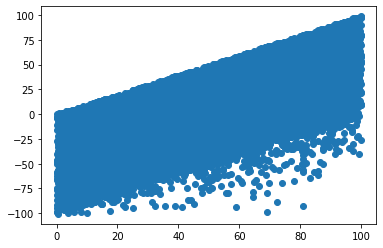

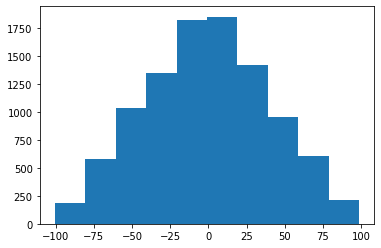

10000 10000
[[ 878.09 ]
 [ 110.382]
 [   0.009]
 ...
 [  37.71 ]
 [2977.881]
 [ 388.542]]
0       49.124978
1       61.262993
2       50.018577
3       21.399984
4       64.973123
          ...    
9995    86.355383
9996    79.640809
9997    23.603852
9998    63.249332
9999     9.866363
Name: vSt, Length: 10000, dtype: float64


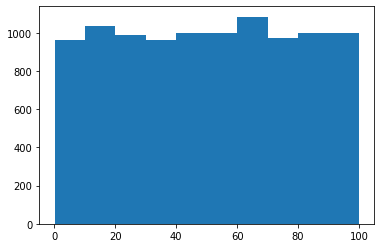

NameError: ignored

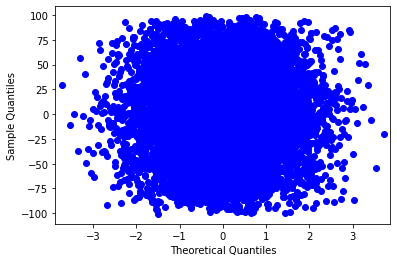

In [ ]:
#analizar


import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

Pricing_test_analisys_features = Pricing_test.copy()

Pricing_test_analisys_features.head()

Pricing_test_analysys_St=Pricing_test_analisys_features.pop('vSt')
Pricing_test_analysys_K=Pricing_test_analisys_features.pop('vK')
Pricing_test_analysys_Tmat=Pricing_test_analisys_features.pop('vTmat')
Pricing_test_analysys_vol=Pricing_test_analisys_features.pop('vvol')
Pricing_test_analysys_r=Pricing_test_analisys_features.pop('vr')


a = np.empty(shape=(len(Pricing_train_results), 1), dtype=float)
for i in range(len(Pricing_train_results)):
    a[i]=(prediction[i]-Pricing_train_results[i])**2

b = np.empty(shape=(len(Pricing_train_results), 1), dtype=float)
for i in range(len(Pricing_train_results)):
    b[i]=(prediction[i]-Pricing_train_results[i])

plt.scatter(Pricing_test_analysys_St,b)
plt.show()

plt.hist(b)
plt.show()

print(len(a),len(Pricing_test_analysys_St))
print(a)
print(Pricing_test_analysys_St)

#plt.scatter(Pricing_test_analysys_St,a)
#plt.show()

plt.hist(Pricing_test_analysys_St)
plt.show()

#plt.hist(a)
#plt.show()

qqplot(b)
pyplot.show()
